<a href="https://colab.research.google.com/github/selfor21/NLP---Natural-Language-Processing/blob/main/NPL_Intro_05_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# NPL - Natural Language Processing

## Week 05 - Machine Learning




# *Fake News* Detector


> *fake news* classifier / detector.

- Data collection
- Representation
  - *Bag of words*
  - TFIDF
- Machine Learning with scikit-learn
  - Training
  - Avaliation
  - Understanding

In [1]:
!pip install graphviz matplotlib scikit-learn # first time
import pandas as pd
import numpy as np

#Data

In [2]:
!wget https://s3.amazonaws.com/assets.datacamp.com/production/course_3629/fake_or_real_news.csv -O fake_or_real_news.csv
df = pd.read_csv('fake_or_real_news.csv')
df.head()

--2023-09-24 14:14:20--  https://s3.amazonaws.com/assets.datacamp.com/production/course_3629/fake_or_real_news.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.98.232, 52.217.108.238, 52.217.106.86, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.98.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30696129 (29M) [text/csv]
Saving to: ‘fake_or_real_news.csv’

fake_or_real_news.c 100%[===================>]  29.27M  41.3MB/s    in 0.7s    

2023-09-24 14:14:21 (41.3 MB/s) - ‘fake_or_real_news.csv’ saved [30696129/30696129]



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [3]:
df[['label']].describe()

,label
count,6335
unique,2
top,REAL
freq,3171


# Representation


## CountVectorizer


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create a series to store the labels: y
y = df.label

# Create training set and test set
X_train, X_test, y_train, y_test = train_test_split(df['text'], y,
                                                    test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:10])

print("Training: ", count_train.toarray().shape)
print("Test: ", count_test.toarray().shape)

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']
Training:  (4244, 56922)
Test:  (2091, 56922)


## TfidfVectorizer


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# transform the test data: tfidf_test
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names_out()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

print("Train: ", tfidf_train.toarray().shape)
print("Test: ", tfidf_test.toarray().shape)

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Train:  (4244, 56922)
Test:  (2091, 56922)


## Vector´s Inspection
With DataFrames, let´s check vector´s.

In [12]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

# Print the head of count_df
print("count_df:")
print(count_df.head())
print()

# Print the head of tfidf_df
print("tfidf_df:")
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrame are equal
print()
print("Are DafaFrame´s equal? ",count_df.equals(tfidf_df))

#print()
print("# features count: ", count_df.columns.size)
print("# features tfidf: ", tfidf_df.columns.size)

count_df:
   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]

tfidf_df:
    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    

# Machine Learning with scikit-learn

Training and test with the *fake news* classifier/detector  with the two representations created before.

Let´s start with `plot_confusion_matrix`.

In [13]:
# Evaluate the classifier using various measures

# Function to plot confusion matrix.
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observado',fontsize=15)
    plt.xlabel('Previsto',fontsize=15)

## Training model with CountVectorizer

Naive Bayes Model.

Acuracy:  0.893352462936394 

Confusion Matrix
 [[ 865  143]
 [  80 1003]] 

ROC_AOC_Score:  0.9337112884550558 



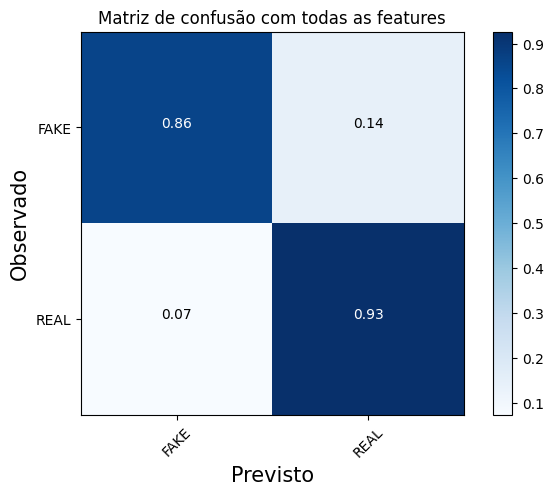

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print("Acuracy: ",score,"\n")

# Calculate the confusion matrix: cm
cm =confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix\n",cm,"\n")

plot_confusion_matrix(cm, classes=['FAKE','REAL'],normalize=True,
                      title='Matriz de confusão com todas as features')

# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb_classifier.predict_proba(count_test)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob),"\n")

## Trainign and testing *fake news* model / detector with TfidfVectorizer


Acuracy:  0.8565279770444764 

Confusion Matrix
 [[ 739  269]
 [  31 1052]] 

ROC_AOC_Score:  0.8972311993433877 



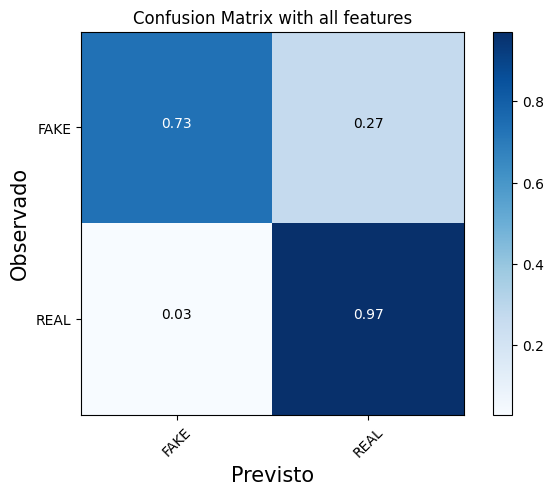

In [15]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print("Acuracy: ",score,"\n")

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix\n",cm,"\n")

plot_confusion_matrix(cm, classes=['FAKE','REAL'],normalize=True,
                      title='Confusion Matrix with all features')

# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb_classifier.predict_proba(count_test)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob),"\n")

## Model parameters adjustment

Different values of `alpha` from Naive Bayes algorithm.

In [16]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha, force_alpha=True)

    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)

    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)

    # Compute accuracy: score
    score = accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Acuracy: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Acuracy:  0.6150167384026781

Alpha:  0.1
Acuracy:  0.8976566236250598

Alpha:  0.2
Acuracy:  0.8938307030129125

Alpha:  0.30000000000000004


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Acuracy:  0.8900047824007652

Alpha:  0.4
Acuracy:  0.8857006217120995

Alpha:  0.5
Acuracy:  0.8842659014825442

Alpha:  0.6000000000000001
Acuracy:  0.874701099952176

Alpha:  0.7000000000000001
Acuracy:  0.8703969392635102

Alpha:  0.8
Acuracy:  0.8660927785748446

Alpha:  0.9
Acuracy:  0.8589191774270684



## Analysing Model

Analyse most important words to determine classes (FAKE ou REAL).

In [17]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Zip the feature names together with the coefficient array
# and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

FAKE [(-11.280753302177917, '00000031'), (-11.280753302177917, '00006'), (-11.280753302177917, '000ft'), (-11.280753302177917, '001'), (-11.280753302177917, '002'), (-11.280753302177917, '003'), (-11.280753302177917, '006'), (-11.280753302177917, '008'), (-11.280753302177917, '010'), (-11.280753302177917, '013'), (-11.280753302177917, '025'), (-11.280753302177917, '027'), (-11.280753302177917, '035'), (-11.280753302177917, '037'), (-11.280753302177917, '040'), (-11.280753302177917, '044'), (-11.280753302177917, '048'), (-11.280753302177917, '066'), (-11.280753302177917, '068'), (-11.280753302177917, '075')]
REAL [(-8.036772745824807, 'president'), (-8.022187159522364, 'american'), (-8.013319806154513, 'media'), (-8.007761560290644, 'donald'), (-8.006632122322646, 'october'), (-7.989623223030759, 'government'), (-7.929695447721539, 'like'), (-7.922750601304927, 'war'), (-7.915731838943572, 'new'), (-7.908889774759155, 'world'), (-7.885018054191407, 'just'), (-7.758145325115569, 'said'),

## Another method (Decision Tree)

Using `TfidfVectorizer` to train and test a Naive Bayes Model.

Acuracy:  0.7527498804399809 

Confusion Matrix
 [[814 194]
 [323 760]] 

|--- feature_44108 <= 0.04
|   |--- feature_42534 <= 0.01
|   |   |--- feature_649 <= 0.00
|   |   |   |--- class: FAKE
|   |   |--- feature_649 >  0.00
|   |   |   |--- class: FAKE
|   |--- feature_42534 >  0.01
|   |   |--- feature_16972 <= 0.07
|   |   |   |--- class: REAL
|   |   |--- feature_16972 >  0.07
|   |   |   |--- class: FAKE
|--- feature_44108 >  0.04
|   |--- feature_35716 <= 0.02
|   |   |--- feature_52298 <= 0.04
|   |   |   |--- class: REAL
|   |   |--- feature_52298 >  0.04
|   |   |   |--- class: FAKE
|   |--- feature_35716 >  0.02
|   |   |--- feature_649 <= 0.01
|   |   |   |--- class: REAL
|   |   |--- feature_649 >  0.01
|   |   |   |--- class: FAKE
 



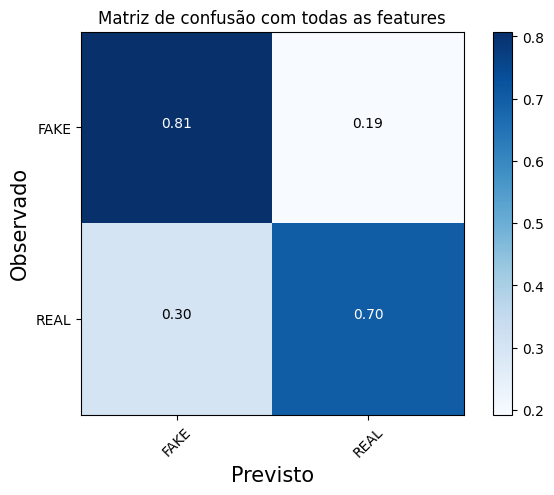

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_classifier =  DecisionTreeClassifier(max_depth=3)

# Fit the classifier to the training data
dt_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = dt_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print("Acuracy: ",score,"\n")

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix\n",cm,"\n")

plot_confusion_matrix(cm, classes=['FAKE','REAL'],normalize=True,
                      title='Matriz de confusão com todas as features')

text_representation = tree.export_text(dt_classifier)
print(text_representation, "\n")


## Model Interpretation

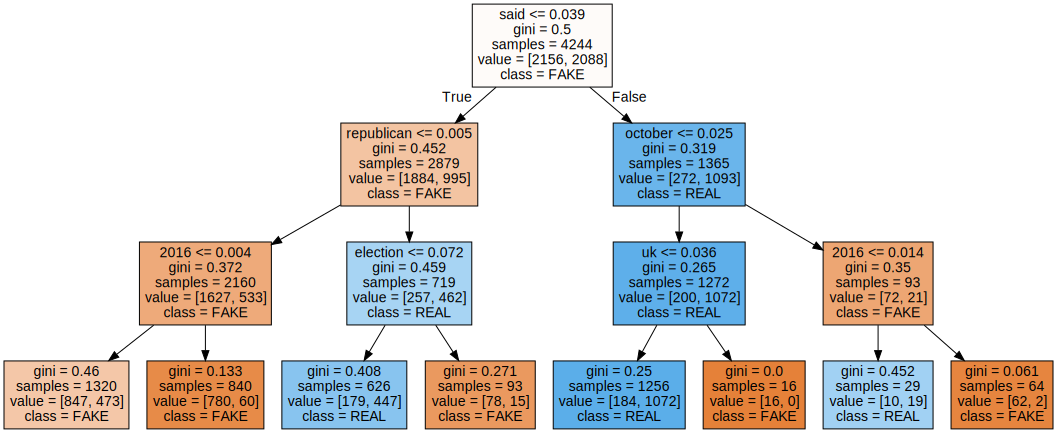

In [19]:
import graphviz
dot_data = tree.export_graphviz(dt_classifier, out_file=None,
                                feature_names=count_vectorizer.get_feature_names_out(),
                                class_names=['FAKE','REAL'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph